This program will read a csv file of 311 data to a dataframe.
The dataframe will be cleaned as such: Remove all data other than the year 2017

The results will be stored to a new csv file.

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import time
%matplotlib inline

In [2]:
# df311 = pd.read_csv('311cleaned.csv')
# dfwx = pd.read_csv('311weather.csv')
# df = pd.merge(df311, dfwx,  left_on='REQUEST_ID', right_on='REQUEST_ID', how='left')  
# saved merged data to 311Master.csv to save time loading
df = pd.read_csv('311Trimmed.csv')

In [3]:
df.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
count,52194.000000,52194.000000,49446.000000,49401.000000,4.948800e+04,49405.000000,49401.000000,49377.000000,49824.000000,49824.000000,...,49488.000000,4.948800e+04,4.948800e+04,49488.000000,4.948800e+04,49488.000000,49488.000000,49488.000000,4.948800e+04,49488.000000
mean,163496.286891,1.199487,4.900821,16.605878,4.200323e+10,3.023722,16.605878,3.592482,-79.433124,40.167845,...,48.252171,1.498006e+09,1.497969e+09,5.264205,1.498013e+09,9.371101,216.096832,9.270438,1.498018e+09,1.533801
std,23598.968639,0.695392,2.585818,7.946364,1.812058e+05,1.437327,7.946364,1.606123,6.545400,3.309922,...,15.393227,8.196202e+06,8.196692e+06,2.415348,8.196433e+06,0.871377,73.609941,4.521697,8.198075e+06,1.162261
min,123272.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-80.088105,0.000000,...,1.200000,1.483276e+09,1.483247e+09,1.000000,1.483290e+09,3.780000,0.000000,1.460000,1.483247e+09,0.020000
25%,143064.750000,1.000000,3.000000,11.000000,4.200311e+10,2.000000,11.000000,2.000000,-80.007463,40.420463,...,37.190000,1.491390e+09,1.491365e+09,3.000000,1.491412e+09,9.040000,188.000000,5.720000,1.491437e+09,0.710000
50%,163452.000000,1.000000,5.000000,16.000000,4.200318e+10,3.000000,16.000000,4.000000,-79.977171,40.445256,...,51.230000,1.497953e+09,1.497931e+09,5.000000,1.497974e+09,9.750000,224.000000,8.790000,1.497989e+09,1.310000
75%,183528.750000,1.000000,7.000000,22.000000,4.200329e+10,5.000000,22.000000,5.000000,-79.934268,40.462229,...,60.910000,1.504091e+09,1.504066e+09,7.000000,1.504109e+09,10.000000,267.000000,11.620000,1.504112e+09,2.110000
max,205290.000000,3.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,0.000000,40.520177,...,73.950000,1.514722e+09,1.514696e+09,10.000000,1.514732e+09,10.000000,359.000000,26.100000,1.514696e+09,6.150000


In [4]:
df.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
0,205290,2017-12-31T23:17:00,Snow/Ice removal,Website,1,DPW - Street Maintenance,Marshall-Shadeland,1.0,27.0,4.200327e+10,...,1.99,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.09,264.0,5.32,1.514696e+09,0.57
1,205289,2017-12-31T22:01:00,Snow/Ice removal,Report2Gov iOS,1,DPW - Street Maintenance,Stanton Heights,9.0,10.0,4.200310e+10,...,1.57,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.06,265.0,5.27,1.514696e+09,0.51
2,205288,2017-12-31T21:55:00,Snow/Ice removal,Website,1,DPW - Street Maintenance,New Homestead,5.0,31.0,4.200331e+10,...,1.76,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.06,257.0,5.38,1.514696e+09,0.63
3,205287,2017-12-31T18:23:00,Missed Pick Up,Website,1,DPW - Refuse,Mount Washington,2.0,19.0,4.200319e+10,...,1.50,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.09,262.0,5.35,1.514696e+09,0.55
4,205286,2017-12-31T17:56:00,Snow/Ice removal,Report2Gov iOS,1,DPW - Street Maintenance,Stanton Heights,9.0,10.0,4.200310e+10,...,1.57,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.06,265.0,5.27,1.514696e+09,0.52


In [5]:
df.columns

Index(['REQUEST_ID', 'CREATED_ON', 'REQUEST_TYPE', 'REQUEST_ORIGIN', 'STATUS',
       'DEPARTMENT', 'NEIGHBORHOOD', 'COUNCIL_DISTRICT', 'WARD', 'TRACT',
       'PUBLIC_WORKS_DIVISION', 'PLI_DIVISION', 'POLICE_ZONE', 'FIRE_ZONE',
       'X', 'Y', 'GEO_ACCURACY', 'current.apparentTemperature',
       'current.cloudCover', 'current.dewPoint', 'current.humidity',
       'current.icon', 'current.precipIntensity', 'current.precipProbability',
       'current.precipType', 'current.pressure', 'current.summary',
       'current.temperature', 'current.time', 'current.uvIndex',
       'current.visibility', 'current.windBearing', 'current.windGust',
       'current.windSpeed', 'daily.apparentTemperatureHigh',
       'daily.apparentTemperatureHighTime', 'daily.apparentTemperatureLow',
       'daily.apparentTemperatureLowTime', 'daily.apparentTemperatureMax',
       'daily.apparentTemperatureMaxTime', 'daily.apparentTemperatureMin',
       'daily.apparentTemperatureMinTime', 'daily.cloudCover',
    

In [6]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False) 

Potholes                                8787
Weeds/Debris                            7933
Building Maintenance                    4068
Abandoned Vehicle (parked on street)    2633
Litter                                  1916
Refuse Violations                       1839
Illegal Parking                         1784
Missed Pick Up                          1735
Referral                                1565
Replace/Repair a Sign                   1554
City Source (CDBG)                      1500
Street Light - Repair                   1458
Building Without a Permit               1442
Vacant Building                         1264
Paving Request                          1260
Overgrowth                              1211
Snow/Ice removal                        1050
Pruning (city tree)                     1032
Rodent control                           985
Question                                 918
Need Potable Water                       857
Fire Safety System Not Working           821
Dead Anima

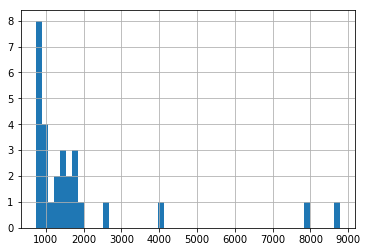

In [7]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False).hist(bins=50)

In [33]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False) 

Potholes                                8787
Weeds/Debris                            7933
Building Maintenance                    4068
Abandoned Vehicle (parked on street)    2633
Litter                                  1916
Refuse Violations                       1839
Illegal Parking                         1784
Missed Pick Up                          1735
Referral                                1565
Replace/Repair a Sign                   1554
City Source (CDBG)                      1500
Street Light - Repair                   1458
Building Without a Permit               1442
Vacant Building                         1264
Paving Request                          1260
Overgrowth                              1211
Snow/Ice removal                        1050
Pruning (city tree)                     1032
Rodent control                           985
Question                                 918
Need Potable Water                       857
Fire Safety System Not Working           821
Dead Anima

In [34]:
df.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
count,52194.000000,52194.000000,49446.000000,49401.000000,4.948800e+04,49405.000000,49401.000000,49377.000000,49824.000000,49824.000000,...,49488.000000,4.948800e+04,4.948800e+04,49488.000000,4.948800e+04,49488.000000,49488.000000,49488.000000,4.948800e+04,49488.000000
mean,163496.286891,1.199487,4.900821,16.605878,4.200323e+10,3.023722,16.605878,3.592482,-79.433124,40.167845,...,48.252171,1.498006e+09,1.497969e+09,5.264205,1.498013e+09,9.371101,216.096832,9.270438,1.498018e+09,1.533801
std,23598.968639,0.695392,2.585818,7.946364,1.812058e+05,1.437327,7.946364,1.606123,6.545400,3.309922,...,15.393227,8.196202e+06,8.196692e+06,2.415348,8.196433e+06,0.871377,73.609941,4.521697,8.198075e+06,1.162261
min,123272.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-80.088105,0.000000,...,1.200000,1.483276e+09,1.483247e+09,1.000000,1.483290e+09,3.780000,0.000000,1.460000,1.483247e+09,0.020000
25%,143064.750000,1.000000,3.000000,11.000000,4.200311e+10,2.000000,11.000000,2.000000,-80.007463,40.420463,...,37.190000,1.491390e+09,1.491365e+09,3.000000,1.491412e+09,9.040000,188.000000,5.720000,1.491437e+09,0.710000
50%,163452.000000,1.000000,5.000000,16.000000,4.200318e+10,3.000000,16.000000,4.000000,-79.977171,40.445256,...,51.230000,1.497953e+09,1.497931e+09,5.000000,1.497974e+09,9.750000,224.000000,8.790000,1.497989e+09,1.310000
75%,183528.750000,1.000000,7.000000,22.000000,4.200329e+10,5.000000,22.000000,5.000000,-79.934268,40.462229,...,60.910000,1.504091e+09,1.504066e+09,7.000000,1.504109e+09,10.000000,267.000000,11.620000,1.504112e+09,2.110000
max,205290.000000,3.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,0.000000,40.520177,...,73.950000,1.514722e+09,1.514696e+09,10.000000,1.514732e+09,10.000000,359.000000,26.100000,1.514696e+09,6.150000


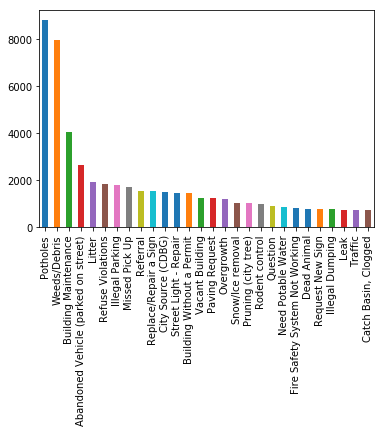

In [35]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

In [36]:
df['REQUEST_ORIGIN'].value_counts(sort=True, ascending=False, dropna=False)

Call Center           33807
Website                8188
Control Panel          6671
Report2Gov iOS         1450
Twitter                1073
Text Message            548
Report2Gov Android      444
Report2Gov Website        6
QAlert Mobile iOS         5
Email                     2
Name: REQUEST_ORIGIN, dtype: int64

In [37]:
df['CREATED_ON'].value_counts(sort=True, ascending=False, dropna=False)

2017-05-01T14:02:00    8
2017-03-07T11:25:00    6
2017-08-27T19:12:00    6
2017-02-01T12:44:00    6
2017-03-29T15:01:00    5
2017-03-07T12:15:00    5
2017-04-17T11:18:00    5
2017-03-08T08:28:00    5
2017-04-05T10:09:00    5
2017-03-08T11:30:00    5
2017-02-01T12:39:00    5
2017-03-09T11:10:00    5
2017-08-21T11:03:00    5
2017-02-01T12:59:00    5
2017-07-07T08:19:00    5
2017-05-31T12:33:00    5
2017-08-03T11:02:00    5
2017-07-03T09:53:00    5
2017-02-01T13:29:00    5
2017-03-08T08:31:00    5
2017-04-20T12:54:00    5
2017-03-07T14:38:00    5
2017-08-27T19:10:00    5
2017-02-01T14:26:00    5
2017-08-03T11:09:00    5
2017-02-01T12:50:00    5
2017-08-02T09:20:00    5
2017-05-30T10:06:00    4
2017-05-22T15:35:00    4
2017-06-26T09:15:00    4
                      ..
2017-08-23T15:12:00    1
2017-02-06T08:12:00    1
2017-05-22T09:03:00    1
2017-07-02T10:46:00    1
2017-10-30T12:15:00    1
2017-02-03T09:55:00    1
2017-04-11T10:10:00    1
2017-01-30T13:12:00    1
2017-05-16T09:33:00    1


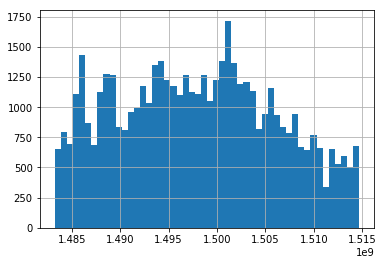

In [38]:
# visualizatins of various fields and weather events
df['daily.time'].hist(bins=50)

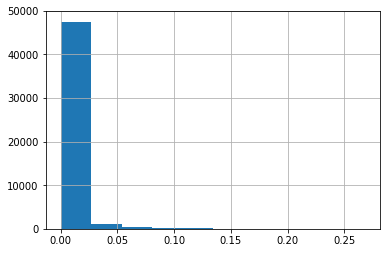

In [39]:
df['current.precipIntensity'].hist()

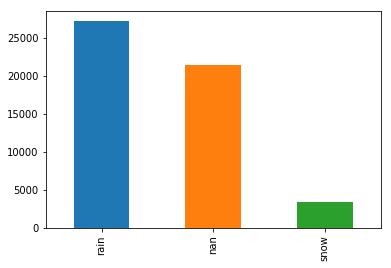

In [40]:
df['daily.precipType'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

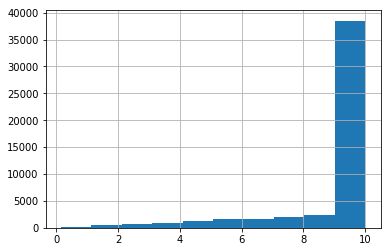

In [41]:
df['current.visibility'].hist(bins=10)

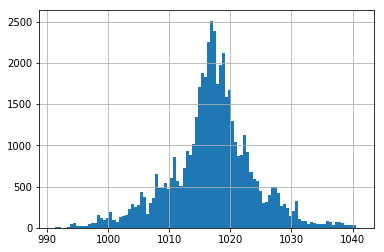

In [42]:
df['current.pressure'].hist(bins=100)

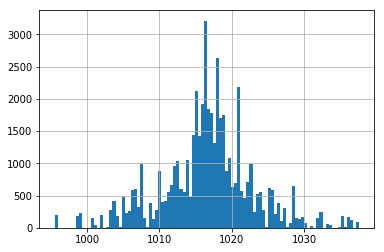

In [43]:
df['daily.pressure'].hist(bins=100)

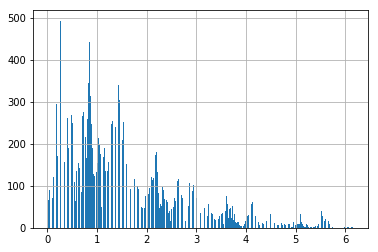

In [44]:
df['daily.windSpeed'].hist(bins=1000)

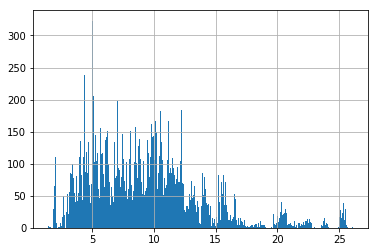

In [45]:
df['daily.windGust'].hist(bins=1000)

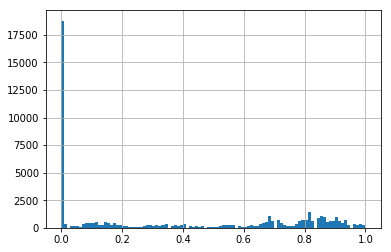

In [46]:
df['daily.precipProbability'].hist(bins=100)

In [47]:
df['current.summary'].value_counts(sort=True, ascending=False, dropna=False)

Clear                      16241
Overcast                   10524
Mostly Cloudy               8929
Partly Cloudy               7008
NaN                         2706
Light Rain                  2449
Drizzle                     2275
Rain                         639
Flurries                     547
Foggy                        493
Light Snow                   129
Humid and Mostly Cloudy       88
Humid and Partly Cloudy       62
Humid and Overcast            57
Light Sleet                   30
Humid                         11
Snow                           5
Heavy Rain                     1
Name: current.summary, dtype: int64

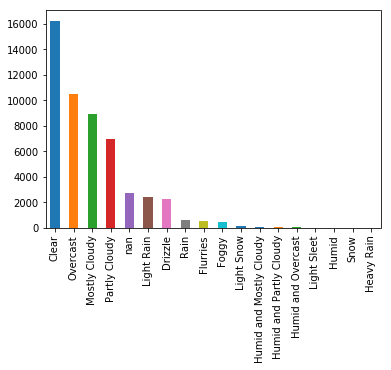

In [48]:
df['current.summary'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

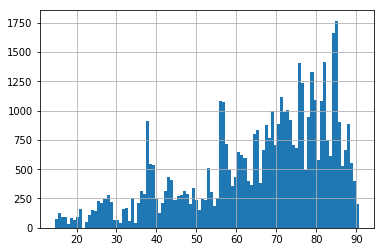

In [49]:
df['daily.temperatureHigh'].hist(bins=100)

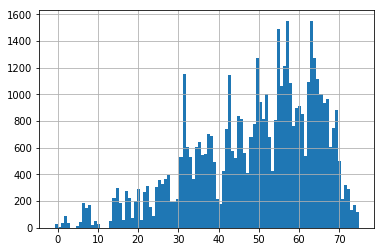

In [50]:
df['daily.temperatureLow'].hist(bins=100)

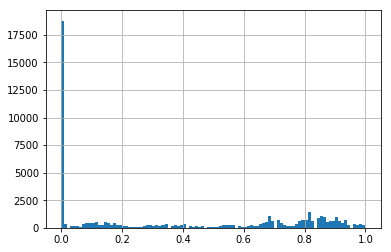

In [51]:
df['daily.precipProbability'].hist(bins=100)

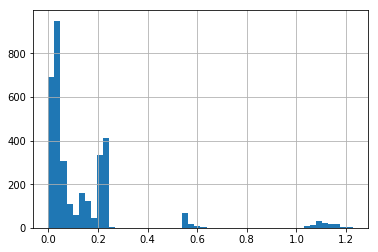

In [52]:
df['daily.precipAccumulation'].hist(bins=50)

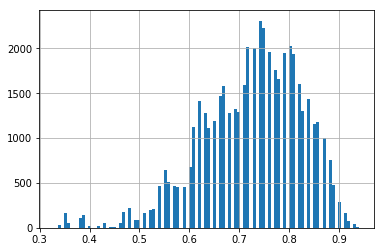

In [53]:
df['daily.humidity'].hist(bins=100)

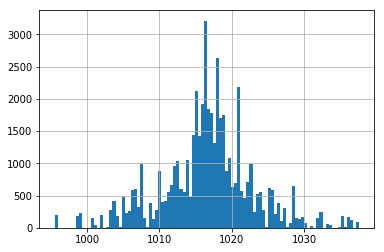

In [54]:
df['daily.pressure'].hist(bins=100)